In [1]:
import numpy as np
from scipy import linalg
%matplotlib inline
import matplotlib.pyplot as plt

# I. Elinimarea Gaussiana

### Genereaza o matrice aleatoare

In [2]:
n = 6
A = np.random.randn(n,n)

for k in range(0,n-1):
    for i in range(k+1,n):
        # Calculeaza multiplicatorii Gaussieni
        A[i][k] = -A[i][k]/A[k][k]   # Se suprascriu in triunghiul inferior
        # Aplica multiplicatorii
        for j in range(k+1,n):
            A[i][j] = A[i][j] + A[k][j]*A[i][k]

### Matricea superior triunghiulara rezultata

In [3]:
A_gauss = np.triu(A)

# II. Problema de clasificare

### Genereaza semnalele

In [4]:
m = 2          # dimensiunea semnalelor
N1 = 20        # #semnale din prima clasa
N2 = 20        # #semnale din a doua clasa

C1 = np.random.randn(m,1) + np.random.randn(m,N1)
C2 = np.random.randn(m,1) + np.random.randn(m,N2)

### Rezolva problema de clasificare ca Ax=b

In [5]:
A = np.r_[np.c_[np.transpose(C1), np.ones((N1,1))], \
     np.c_[np.transpose(C2), np.ones((N2,1))]]
b = np.r_[np.ones((N1,1)), -np.ones((N2,1))]

#### Solutia e ecuatia dreptei care separa clasele

In [6]:
x, _, _, _ = linalg.lstsq(A, b)

### Afiseaza semnalele si dreapta de separare

#### Coeficientii dreptei

In [7]:
s = -x[0]/x[1] # slope
i = -x[2]/x[1] # intercept

### Afiseaza figura

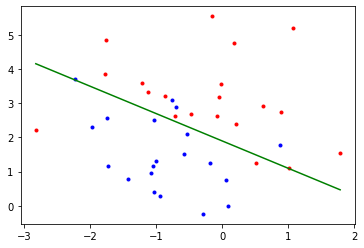

In [8]:
minx = np.min([C1[0,:], C2[0,:]])
maxx = np.max([C1[0,:], C2[0,:]])

line_x_range = [minx, maxx]
line_y_range = i + s*line_x_range

fig, ax = plt.subplots()

ax.plot(C1[0,:], C1[1,:], '.r')
ax.plot(C2[0,:], C2[1,:], '.b')
ax.plot(line_x_range, line_y_range,'g')